# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
mycsvfile=pd.read_csv('glass.csv')
mycsvfile.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
mycsvfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
X=mycsvfile[["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]]
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [5]:
Y=mycsvfile["Type"]
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=1)

In [47]:
X_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
108,1.52222,14.43,0.00,1.00,72.67,0.10,11.52,0.00,0.08
206,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24
51,1.51926,13.20,3.33,1.28,72.36,0.60,9.14,0.00,0.11
...,...,...,...,...,...,...,...,...,...
48,1.52223,13.21,3.77,0.79,71.99,0.13,10.02,0.00,0.00
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00


In [8]:
Y_test

108    2
206    7
106    2
107    2
51     1
      ..
48     1
172    5
66     1
197    7
89     2
Name: Type, Length: 86, dtype: int64

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
def predict(features,weights):
    z=np.dot(features,weights)
    a=sigmoid(z)
    return a

In [11]:
def costfunction(features,labels,weights):
    observations=len(labels)
    predictions=predict(features,weights)
    class1_cost=-labels*np.log(predictions)
    class2_cost=(1-labels)*np.log(1-predictions)
    cost=class1_cost-class2_cost
    cost=cost.sum()/observations
    return cost

In [12]:
def updateweights(features,labels,weights,learningrate):
    N=len(features)
    predictions=predict(features,weights)
    gradient=np.dot(features.T,predictions-labels)
    gradient/=N
    graient*=learningrate
    weights-=gradient
    return weights

In [13]:
def decisionboundary(probability):
    if probability>=0.5:
        return 1
    else:
        return 0

In [14]:
def classify(predictions):
    decisionboundary=np.vectorise(decisionboundary)
    return decisionboundary(predictions).flatten()

In [15]:
def train(features,labels,weights,learningrate,iterations):
    costhistory=[]
    for i in range(iterations):
        weights=updateweights(features,labels,weights,learningrate)
        cost=costfunction(features,labels,weights)
        costhistory.append(cost)
        
        if i%1000==0:
            print("Iteration: "+str(i)+" Cost: "+str(cost))  
    return weights,costhistory

In [16]:
def accuracy(predictedlabels,actuallabels):
    difference=predictedlabels-actuallabels
    return 1-float((np.count_nonzero(diff))/len(difference))

In [17]:
def plotdecisionboundary(trues,falses):
    fig=plt.figure()
    ax=fig.subplot(111)
    noofpredictions=len(trues)+len(falses)
    ax.scatter([i for i in range(len(trues))],trues,s=25,c='b',marker="o",label='Trues')
    ax.scatter([i for i in range(len(falses))],falses,s=25,c='r',marker="s",label='Falses')
    plt.legend(loc="upper right")
    ax.set_title("Decision boundary")
    ax.set_xlabel("N/2")
    ax.set_ylabel("Predicted Probability")
    plt.axhline(0.5,color="black")
    plt.show()

### Scikit learn example

In [18]:
myclassifier=LogisticRegression(max_iter=1000)
myclassifier.fit(X_train,Y_train)
Y_pred=myclassifier.predict(X_test)
print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(Y_test, Y_pred)*100)

Logistic Regression model accuracy(in %): 63.95348837209303


#### Model Importance
Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.

Feature: 0, Score: -0.01520
Feature: 1, Score: -0.43241
Feature: 2, Score: 1.19249
Feature: 3, Score: -1.60139
Feature: 4, Score: 0.05899
Feature: 5, Score: -0.03283
Feature: 6, Score: 0.17520
Feature: 7, Score: 0.24119
Feature: 8, Score: -0.16576


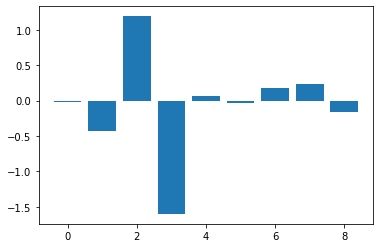

In [45]:
model_importance=myclassifier.coef_[0]
model_importance
for i,v in enumerate(model_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
plt.bar([x for x in range(len(model_importance))], model_importance)
plt.show()

In [19]:
X_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
54,1.51778,13.21,2.81,1.29,72.98,0.51,9.02,0.00,0.09
102,1.51820,12.62,2.76,0.83,73.81,0.35,9.42,0.00,0.20
124,1.52177,13.20,3.68,1.15,72.75,0.54,8.52,0.00,0.00
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34
98,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.00,0.00
...,...,...,...,...,...,...,...,...,...
203,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,1.71,0.00
137,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.00,0.00
72,1.51593,13.09,3.59,1.52,73.10,0.67,7.83,0.00,0.00
140,1.51690,13.33,3.54,1.61,72.54,0.68,8.11,0.00,0.00


In [20]:
Y_train

54     1
102    2
124    2
105    2
98     2
      ..
203    7
137    2
72     2
140    2
37     1
Name: Type, Length: 128, dtype: int64

In [21]:
Y_test

108    2
206    7
106    2
107    2
51     1
      ..
48     1
172    5
66     1
197    7
89     2
Name: Type, Length: 86, dtype: int64

In [22]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 108 to 89
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      86 non-null     float64
 1   Na      86 non-null     float64
 2   Mg      86 non-null     float64
 3   Al      86 non-null     float64
 4   Si      86 non-null     float64
 5   K       86 non-null     float64
 6   Ca      86 non-null     float64
 7   Ba      86 non-null     float64
 8   Fe      86 non-null     float64
dtypes: float64(9)
memory usage: 6.7 KB


In [23]:
len(X_test)

86

/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Classes Count'}, xlabel='Type', ylabel='count'>

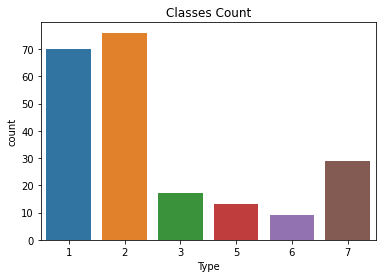

In [24]:
plt.title('Classes Count')
sns.countplot(mycsvfile['Type'])

/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


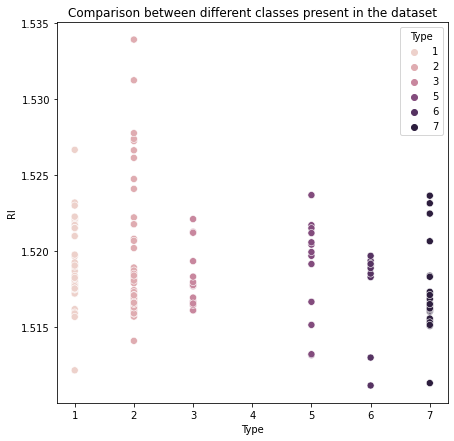

In [31]:
plt.figure(figsize=(7,7))
plt.title('Comparison between different classes present in the dataset')
sns.scatterplot(mycsvfile['Type'], mycsvfile['RI'], hue = mycsvfile['Type'], s= 50);

/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


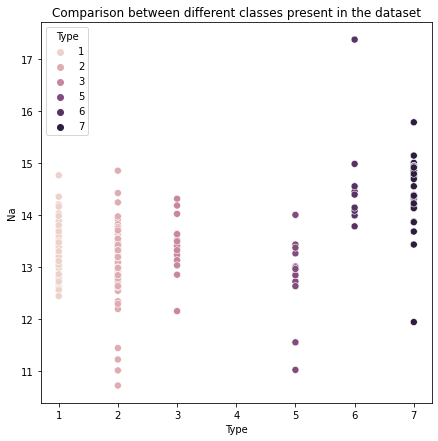

In [30]:
plt.figure(figsize=(7,7))
plt.title('Comparison between different classes present in the dataset')
sns.scatterplot(mycsvfile['Type'], mycsvfile['Na'], hue = mycsvfile['Type'], s= 50);

/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


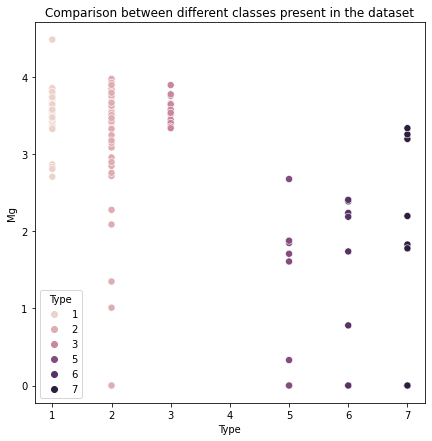

In [32]:
plt.figure(figsize=(7,7))
plt.title('Comparison between different classes present in the dataset')
sns.scatterplot(mycsvfile['Type'], mycsvfile['Mg'], hue = mycsvfile['Type'], s= 50);

/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


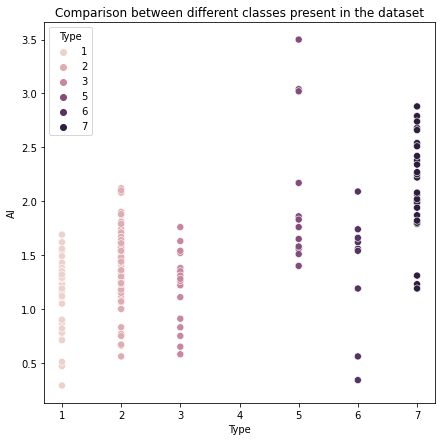

In [33]:
plt.figure(figsize=(7,7))
plt.title('Comparison between different classes present in the dataset')
sns.scatterplot(mycsvfile['Type'], mycsvfile['Al'], hue = mycsvfile['Type'], s= 50);

/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Comparison between different classes present in the dataset'}, xlabel='Type', ylabel='Si'>

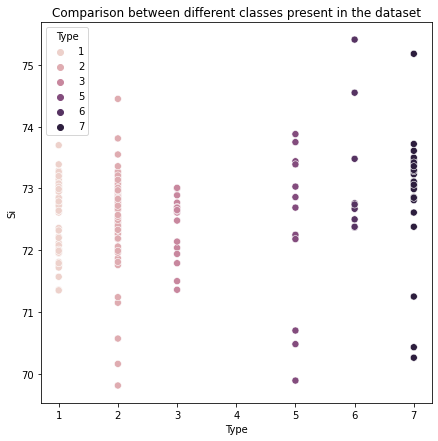

In [34]:
plt.figure(figsize=(7,7))
plt.title('Comparison between different classes present in the dataset')
sns.scatterplot(mycsvfile['Type'], mycsvfile['Si'], hue = mycsvfile['Type'], s= 50)

/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


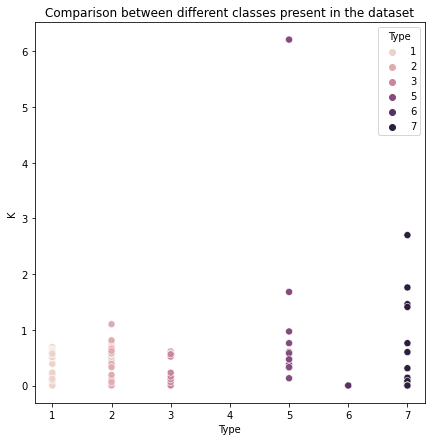

In [35]:
plt.figure(figsize=(7,7))
plt.title('Comparison between different classes present in the dataset')
sns.scatterplot(mycsvfile['Type'], mycsvfile['K'], hue = mycsvfile['Type'], s= 50);

/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


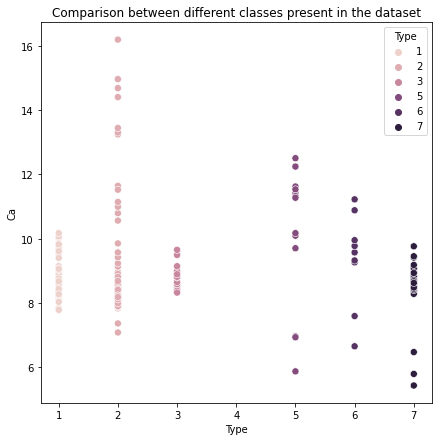

In [36]:
plt.figure(figsize=(7,7))
plt.title('Comparison between different classes present in the dataset')
sns.scatterplot(mycsvfile['Type'], mycsvfile['Ca'], hue = mycsvfile['Type'], s= 50);

/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


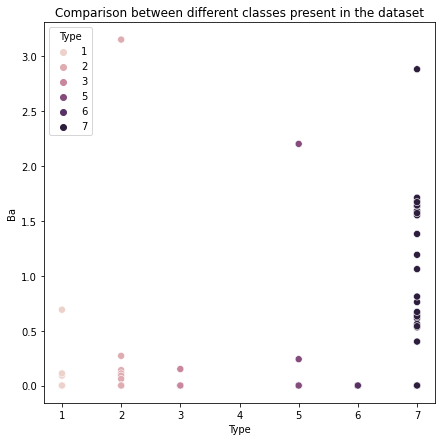

In [37]:
plt.figure(figsize=(7,7))
plt.title('Comparison between different classes present in the dataset')
sns.scatterplot(mycsvfile['Type'], mycsvfile['Ba'], hue = mycsvfile['Type'], s= 50);

/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


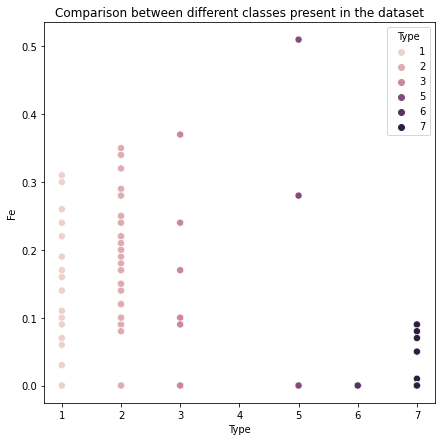

In [38]:
plt.figure(figsize=(7,7))
plt.title('Comparison between different classes present in the dataset')
sns.scatterplot(mycsvfile['Type'], mycsvfile['Fe'], hue = mycsvfile['Type'], s= 50);